# Introduction

This project looks at life expectancy around the world. Secondly, is it possible to predict the continent based on the life expectancy of overall life, male life and female life. The data consists of 223 rows and 6 columns (Rank, Country, Overall Life, Male Life, Female Life, Continent).

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/home/james/Downloads/Life_expectancy_dataset.csv', encoding='latin-1')

In [3]:
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


Compare the life expectancy between male and females and create two new columns. The First looks at the differences between males and females and the second are the ratio.

In [4]:
df['Difference'] = - df['Male Life'] + df['Female Life']
df['Ratio'] = df['Male Life']/df['Female Life']

In [5]:
df.sort_values(by = 'Ratio').head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Difference,Ratio
155,156,Russia,70.3,64.3,76.4,Asia,12.1,0.841623
137,138,Belarus,72.7,67.2,78.6,Europe,11.4,0.854962
111,112,Lithuania,74.9,69.5,80.6,Europe,11.1,0.862283
150,151,Kazakhstan,70.8,65.6,75.7,Asia,10.1,0.866579
147,148,Ukraine,71.8,67.1,76.9,Europe,9.8,0.872562


In [6]:
df.sort_values(by = 'Difference').head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Difference,Ratio
211,212,Botswana,54.5,56.3,52.6,Africa,-3.7,1.070342
121,122,Montserrat,74.4,75.8,72.9,North America,-2.9,1.039781
219,220,Swaziland,51.6,52.2,51.0,Africa,-1.2,1.023529
214,215,Lesotho,53.0,52.9,53.1,Africa,0.2,0.996234
218,219,Gabon,52.1,51.6,52.5,Africa,0.9,0.982857


The data shows that on average men in Russia die 12.1 years before females. Also, three Countries where men live longer than women (Botswana, Montserrat and Swaziland).

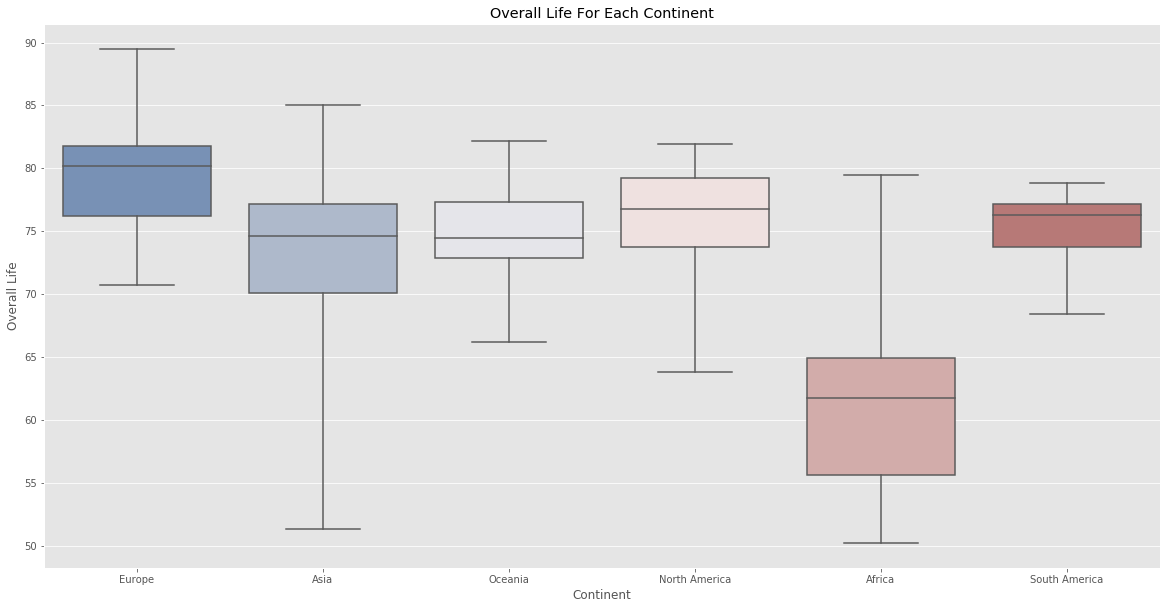

In [7]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Continent', y='Overall Life', data=df,
            whis="range", palette="vlag")
plt.title('Overall Life For Each Continent')
plt.show()

The barplot shows that Europe (79.01) has the highest mean life expectancy and Africa (61.8) has the lowest life expectancy. North America (76.27) and South America (75.04) have similar life expectancy and Asia (73.61) and Oceania (74.23) also have similar life expectancy.


Next, we are going to build a model to see whether total life expectancy, male life expectancy and female life expectancy can predict the continent.

In [8]:
df.groupby('Continent').size()

Continent
Africa           55
Asia             49
Europe           51
North America    34
Oceania          20
South America    14
dtype: int64

In [9]:
df['Continent'] = df['Continent'].replace({'Africa':0, 
                                           'Asia':1, 
                                           'Europe':2, 
                                           'North America':3, 
                                           'Oceania':4, 
                                           'South America':5})

In [10]:
df = df[['Overall Life', 'Male Life', 'Female Life', 'Continent']]

X = df.iloc[:, :4]
y = df['Continent']

Split the data in to training and test set 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [12]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Next the model needs to be trained using the training data and then make the prediction.

In [13]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)  
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [14]:
y_pred = knn.predict(X_test)

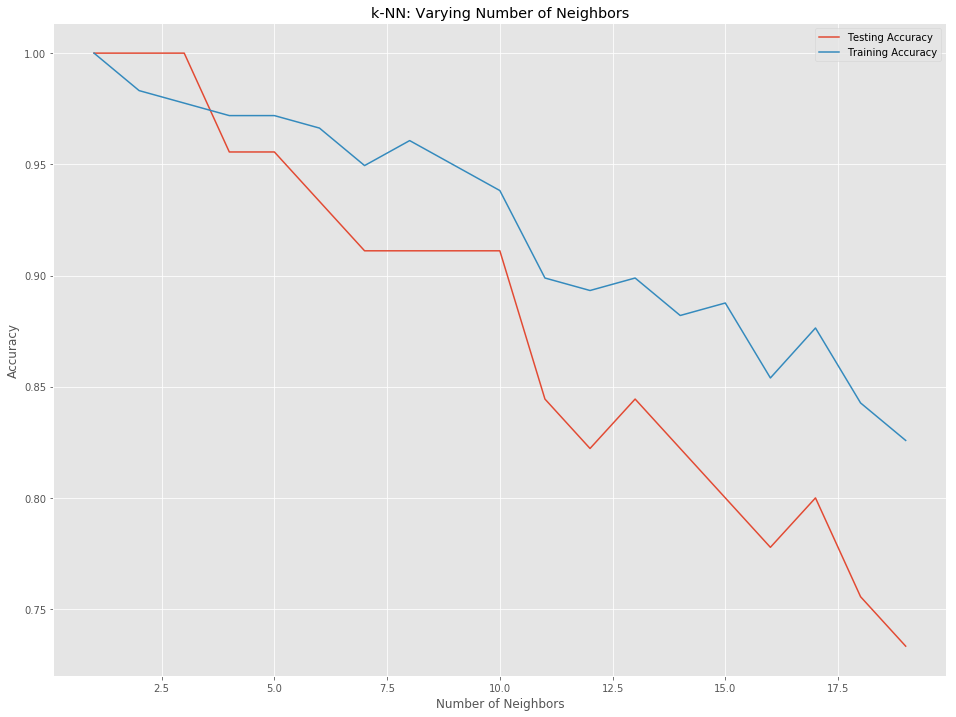

In [15]:
plt.figure(figsize=(16, 12))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [16]:
print(confusion_matrix(y_test, y_pred))

[[ 9  3  0  0  0  0]
 [ 0 10  2  0  0  0]
 [ 0  1  9  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  2  1  0]
 [ 0  0  0  0  4  0]]


In [17]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.75      0.86        12
          1       0.71      0.83      0.77        12
          2       0.82      0.90      0.86        10
          3       0.67      1.00      0.80         4
          4       0.20      0.33      0.25         3
          5       0.00      0.00      0.00         4

avg / total       0.71      0.73      0.71        45



/home/james/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
